# Main analysis

In [2]:
# imports
import main
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

## Generate data

In [8]:

reload(main)

# run settings
GF = 2

# set what dimensions the matrices are generated through
run_from = 2
up_to = 6

n_list = []         # parallel list of n 
chol_len_list = []  # list of the number of chol matrices based on n_dim
sqrt_len_list = []  # list of the number of sqrt matrices based on n_dim


chol_list = []      # list that will store lists of all chol matrices at each n
sqrt_list = []      # list that will store lists of all sqrt matrices at each n

# fill the lists
for dim in range(run_from, up_to):
    general_upper_matrix = main.generate_upper_triangular_matrix_of_nxn(dim)
    upper_triangular_list = main.find_matrix_list_from_gen(GF, general_upper_matrix)
    sqrt_list_at_n = main.generate_square_root_matrices(GF, upper_triangular_list)
    chol_list_at_n = main.generate_cholesky_roots_matrices(GF, upper_triangular_list)

    n_list.append(dim)
    sqrt_list.append(sqrt_list_at_n)
    chol_list.append(chol_list_at_n)
    sqrt_len_list.append(len(sqrt_list_at_n))
    chol_len_list.append(len(chol_list_at_n))

## Frequencies at nxn 
As n increases, how does the number of chol and sqrt matrices grow?

Cholesky dict
2: 2
3: 6
4: 28
5: 192

sqrt list
2: 2
3: 6
4: 28
5: 192


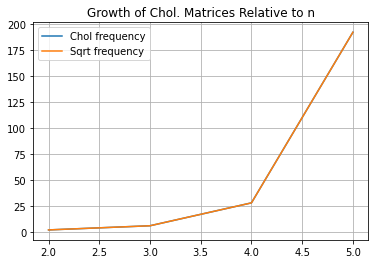

In [6]:
print("Cholesky dict")
for i in range(len(sqrt_len_list)):
    print(str(n_list[i]) + ": " + str(chol_len_list[i]))
print()
print("sqrt list")
for i in range(len(sqrt_len_list)):
    print(str(n_list[i]) + ": " + str(sqrt_len_list[i]))

fig = plt.figure()
fig.patch.set_facecolor("white")
plt.title("Growth of Chol. Matrices Relative to n")

plt.plot(n_list, chol_len_list, label="Chol frequency")
plt.plot(n_list, sqrt_len_list, label="Sqrt frequency")

plt.legend()
plt.xticks(np.arange(min(n_list), max(n_list) + 1, 1.0))

plt.grid(True)

plt.show()